# Read and Preprocess

#Instruction: Import required libraries here

In [ ]:
# Import
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [ ]:
import pandas as pd
import numpy as np

#Instruction: From this [link](https://github.com/dayanandv/Data-Science/tree/main/Evaluation%201_Preprocessing), read the following files into dataframes:

    

1.   LokSabhaMPs.xls to the dataframe `mps`
2.   Each sheet (there are six in total) of the file Seventeenth Lok Sabha_Attendance.xlsx to a list of DataFrames named `attendance`; i.e. each element of the list will be a DataFrame corresponding to a sheet in the file which represents one session.

Preprocess, so that:

1. The dataframe header map to the row number where column names are listed.
2. Extra space at the end of Member Name are handled.

Description of the attendance dataset from http://loksabhaph.nic.in

S= The Member Signed the Register

S*= The Member signed through Mobile Attendance Application

S#= The Member signed through both the Register & Mobile Attendance Application

NS= The Member did not sign the register. (A Member might have attended the sitting of the House on a particular day but did not sign or forgot to sign the Register for that day )

NS@= Member was present but forgot to sign the Attendance Register

NR= Not Required. (Hon'ble Speaker, Deputy Speaker, Prime Minister and Minister usually do not sign the Members' Attendance Register)


In [ ]:
mps = pd.read_excel('https://github.com/dayanandv/Data-Science/blob/main/Evaluation%201_Preprocessing/LokSabha_MPs.xls?raw=2')
# Write your code here

In [ ]:
attendance = []
for i in range(6):
  data = pd.read_excel('https://github.com/dayanandv/Data-Science/blob/main/Evaluation%201_Preprocessing/Seventeenth%20Lok%20Sabha_Attendance.xlsx?raw==true', sheet_name = i)
  attendance.append(data)

# Q1. Edit the function q1 such that it returns a tuple containing the the number of rows of `mps` and number of elements in `attendance` respectively.

In [ ]:
def q1():
  # Write your code here
  nor_mps = mps.shape[0]
  nor_attendance = 0
  for i in range(6):
    nor_attendance = nor_attendance + attendance[i].shape[0]  
  return (nor_mps, nor_attendance)
q1()

(542, 2909)

#Instruction: Have the attendance percentages of each session (sheet) calculated and added to its respective dataframe as a column named `Attendance Percentage`.

In [ ]:
# Write your code here
for i in attendance:
  i['Attendance Percentage'] = i['No. of days Members signed the Register']/(i['No. of days Members signed the Register'] + i['No. of days Members not signed the Register'])*100
attendance[1].head(5)

,Division NO,Member Name,No. of days Members signed the Register,No. of days Members not signed the Register,Attendance Percentage
0,15,Dr. Jitendra Singh,19,1,95.0
1,20,Shri Faggan Singh Kulaste,1,19,5.0
2,22,Dr. Sanjay Jaiswal,15,5,75.0
3,31,Shri Rakesh Singh,16,4,80.0
4,32,Shri Nishikant Dubey,20,0,100.0


#Q2. Edit the function q2 such that it returns the percentage of MPs among those who attended session 1 (round to two decimal places) who had 100% attendance.

In [ ]:
def q2():
  # Write your code here
  percentage = len(attendance[0][attendance[0]['Attendance Percentage'] == 100])/len(attendance[0])*100
  return round(percentage, 2)
q2()

20.23

#Q3. Edit the function q3 such that it returns the skew value (round to two decimal places) of the Attendance Percentages of MPs in session 2 (sheet 2).  

In [ ]:
def q3():
  # Write your code here
  skew = attendance[1]['Attendance Percentage'].skew()
  return round(skew, 2)
q3()

-1.64

#Q4. Edit the function q4 such that it returns the kurtosis value of the number of days that the MPs have not signed in the register during session 3 (sheet 3).  

In [ ]:
def q4():
  # Write your code here
  kurt = attendance[2]["No. of days Members not signed the Register"].kurt()
  return round(kurt, 2)
q4()

1.56

#Instruction: Plot a histogram of the Attendance Percentage' column of session 4 (sheet 4) and use it to answer the following question.

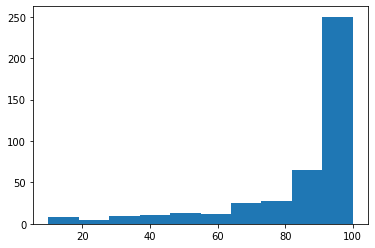

In [ ]:
# Write your code here
plt.hist(attendance[3]['Attendance Percentage'])
plt.show()

#Q5. Edit the function q5 such that it returns the boolean value corresponding to whether the histogram of the `Attendance Percentage` column of any arbitrary session shows a heavily skewed distribution (True/False). The session number is  to be passed onto the function as an integer argument.

For this example, assume that we call a distribution as heavily skewed if it's absolute skew value is **more than 1.7**.

In [ ]:
def q5(session_number):
    # Write your code here
    skew = attendance[session_number-1]['Attendance Percentage'].skew()
    if(abs(round(skew,2))>1.7):
        answer = True
    else:
        answer = False
    return answer
    
q5(5)

False

#Q6. Edit the function q6 such that it goes through the mean values of the attendance percentages of each session and returns a list named `outliers` with the number(s) of the session(s) which is/are outlier(s). If there are no outliers return an empty list.

In [ ]:
def q6():
  #Write your code here
  outliers = []
  for i in range (0, len(attendance)):
    q1 = attendance[i]['Attendance Percentage'].quantile(0.25)
    q3 = attendance[i]['Attendance Percentage'].quantile(0.75)
    iqr = q3 - q1
    data = ((attendance[i]['Attendance Percentage'] < (q1 - 1.5 * iqr)) | (attendance[i]['Attendance Percentage'] > (q3 + 1.5 * iqr))).sum()
    outliers.append(data)
  return outliers

q6()

[48, 34, 17, 34, 0, 26]